In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 5.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from random import random
import seaborn as sns

data = pd.read_csv('ETH_USD_2015-08-09_2020-12-07-CoinDesk.csv')

start=0
end=900
predictions=[]
true_value=[]
avg_errors=[]
MSEs=[]
dates=[]

while len(data) - end >7:
    errors=[]
    summ=0
    training_data = data['Closing Price (USD)'][start:end]
    model = ARIMA(training_data,order=(2,0,1))
    model_fit=model.fit()
    test=model_fit.predict(len(training_data),len(training_data) + 6)
    temp = end
    for entry in test:
      dates.append(data['Date'][end])
      true_price=data['Closing Price (USD)'][end]
      true_value.append(true_price)
      predictions.append(entry)
      abs_Difference=abs(true_price-entry)
      error =(abs_Difference/true_price)*100
      errors.append(error)
      difference_sq=abs(true_price-entry)**2
      summ=summ+difference_sq
      temp+=1
    avg_errors.append(sum(errors)/len(errors))
    MSE=summ/len(test)
    MSEs.append(MSE)
    start+=10
    end+=10

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Text(0.5, 1.0, 'average valur of errors for each 10 day window')

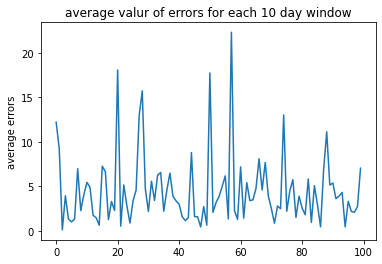

In [ ]:
plt.plot(avg_errors)
plt.ylabel('average errors')
plt.title('average value of errors for each 7 day window')

In [ ]:
compare_data= pd.DataFrame(columns=['Date', 'True Value', 'Predicted Value'])
compare_data['Date'] = dates
compare_data['True Value']=true_value
compare_data['Predicted Value']=predictions
compare_data

,Date,True Value,Predicted Value
0,25/01/2018,1088.430000,949.242307
1,25/01/2018,1088.430000,968.994114
2,25/01/2018,1088.430000,947.512114
3,25/01/2018,1088.430000,967.124594
4,25/01/2018,1088.430000,945.785313
...,...,...,...
995,20/11/2020,507.630342,471.721501
996,20/11/2020,507.630342,471.413551
997,20/11/2020,507.630342,471.105517
998,20/11/2020,507.630342,470.798203


Text(0.5, 1.0, 'True Values')

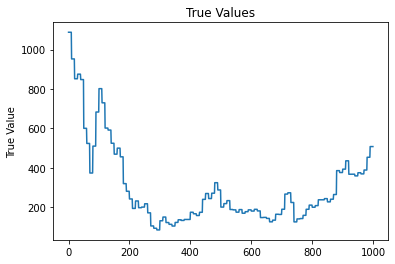

In [ ]:
plt.plot(compare_data['True Value'] )
plt.plot(compare_data['Predicted Value'] )
plt.ylabel('Ethereum Value')
plt.title('Predicted and True Values')